In [7]:
from pyproj import Transformer
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#read the data as a pandas dataframe
df = pd.read_csv(r"W:\VUB\main_research\data\RMI\gridded_data_docu\grid 5x5km_def.csv", delimiter=" ", skiprows=1)

# Define the transformer from WGS84 (EPSG:4326) to Belgian Lambert 1972 (EPSG:31370)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:31370")

# Function to transform coordinates
def transform_coords(lat, lon):
    return transformer.transform(lat, lon)

# Apply the transformation to each row in the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: transform_coords(row['LAT'], row['LON']), axis=1))

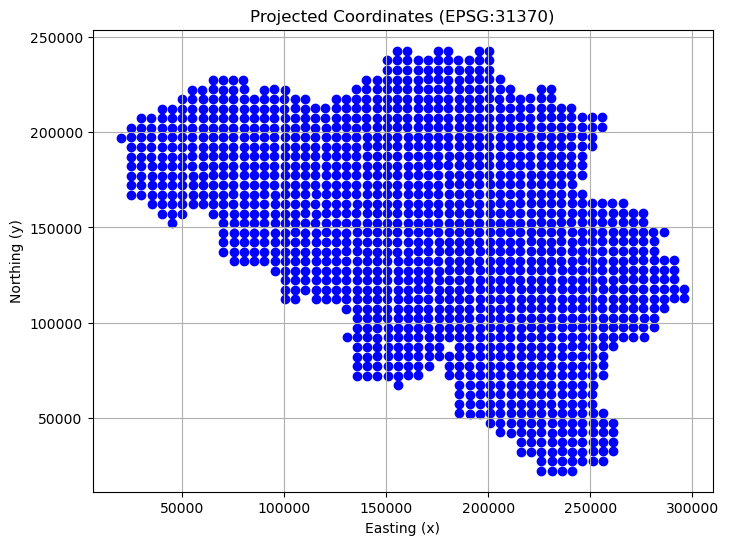

In [9]:
# Plotting the grid
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', marker='o')

#for i, row in df.iterrows():
    #plt.text(row['x'], row['y'], f"({row['y']:.2f}, {row['x']:.2f})", fontsize=9)

plt.title('Projected Coordinates (EPSG:31370)')
plt.xlabel('Easting (x)')
plt.ylabel('Northing (y)')
plt.grid(True)
plt.show()

In [4]:
(-df['x'].min()+df['x'].max())/5000

55.20449394306418

In [11]:
df['x'].min(), df['x'].max(), df['y'].min(), df['y'].max()

(20008.542846339362, 296031.01256166026, 22518.71506678313, 242580.53282968607)

   PIXEL_ID     LAT    LON                  x                  y
0      1355  51.492  4.518  160365.9177777095  242501.6807273403
1      1356  51.491  4.734  175369.5069810553  242442.5341017647
2      1357  51.491  4.806  180370.5870284854  242469.6066385340
3      1358  51.491  5.023  195443.0947428983  242580.5328296861
4      1359  51.490  5.095  200445.1210185064  242515.8078272548


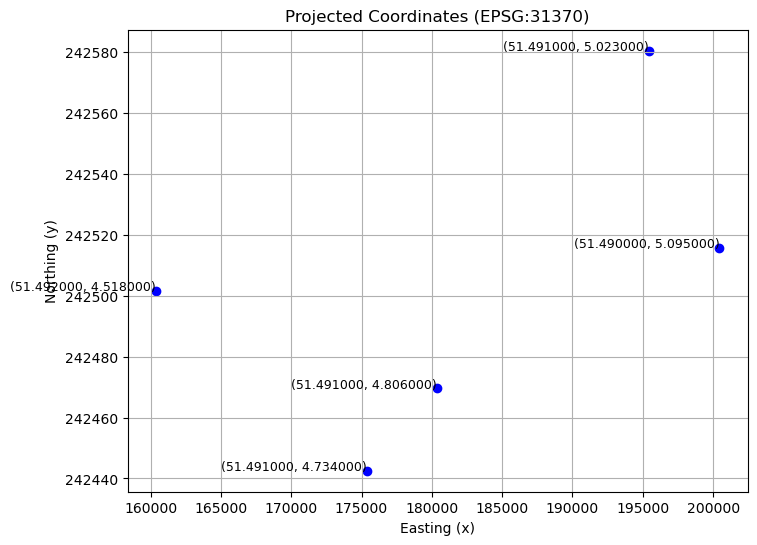

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer

# Example data: replace with your actual data
data = {
    'PIXEL_ID': [1355, 1356, 1357, 1358, 1359],
    'LAT': [51.492, 51.491, 51.491, 51.491, 51.490],
    'LON': [4.518, 4.734, 4.806, 5.023, 5.095]
}
df = pd.DataFrame(data)

# Define the transformer from WGS84 (EPSG:4326) to Belgian Lambert 1972 (EPSG:31370)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:31370")

# Function to transform coordinates
def transform_coords(lat, lon):
    return transformer.transform(lat, lon)

# Apply the transformation to each row in the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: transform_coords(row['LAT'], row['LON']), axis=1))

# Display the transformed DataFrame with high precision
pd.set_option('display.precision', 10)
print(df)

# Plotting the grid
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', marker='o')

for i, row in df.iterrows():
    plt.text(row['x'], row['y'], f"({row['LAT']:.6f}, {row['LON']:.6f})", fontsize=9, ha='right')

plt.title('Projected Coordinates (EPSG:31370)')
plt.xlabel('Easting (x)')
plt.ylabel('Northing (y)')
plt.grid(True)
plt.show()
